<a href="https://colab.research.google.com/github/jward6301/datasci_5_statistics/blob/main/datasci_5_statisticspy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing packages and datasets

In [115]:
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

All datasets were either previously used from another assignment or downlaoded from Kaggle

In [116]:
df1 = pd.read_csv('https://raw.githubusercontent.com/jward6301/datasci_5_statistics/main/datasets/VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
df1

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,YC,2023,March,12 month-ending,Heroin (T40.1),654,100.0,0.97708,New York City,Underreported due to incomplete data.,*,734
59396,YC,2023,March,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...","2,366",100.0,0.97708,New York City,Underreported due to incomplete data.,*,"2,686"
59397,YC,2023,March,12 month-ending,Methadone (T40.3),286,100.0,0.97708,New York City,Underreported due to incomplete data.,*,319
59398,YC,2023,March,12 month-ending,Cocaine (T40.5),"1,429",100.0,0.97708,New York City,Underreported due to incomplete data.,*,"1,611"


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jward6301/datasci_5_statistics/main/datasets/drug-use-by-age.csv')
df2

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/jward6301/datasci_5_statistics/main/datasets/Maternal%20Health%20Risk%20Data%20Set.csv')
df3

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
df4 = pd.read_csv('https://raw.githubusercontent.com/jward6301/datasci_5_statistics/main/datasets/bmi.csv')
df4

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


1. Chi-Square Test:
Null Hypothesis (H0): There is no significant correlation between State Name and Indicator.

Alternative Hypothesis (H1): There is a significant correlation between State Name and Indicator.

In [ ]:
#Replacing unwanted characters in column names such as spaces
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace(r'[^a-zA-z0-9]', '')
df1.columns = df1.columns.str.lower()
df1

<ipython-input-6-d1de05ca7dc3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.columns = df1.columns.str.replace(r'[^a-zA-z0-9]', '')


,state,year,month,period,indicator,data_value,percent_complete,percent_pending_investigation,state_name,footnote,footnote_symbol,predicted_value
0,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.00000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,YC,2023,March,12 month-ending,Heroin (T40.1),654,100.0,0.97708,New York City,Underreported due to incomplete data.,*,734
59396,YC,2023,March,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...","2,366",100.0,0.97708,New York City,Underreported due to incomplete data.,*,"2,686"
59397,YC,2023,March,12 month-ending,Methadone (T40.3),286,100.0,0.97708,New York City,Underreported due to incomplete data.,*,319
59398,YC,2023,March,12 month-ending,Cocaine (T40.5),"1,429",100.0,0.97708,New York City,Underreported due to incomplete data.,*,"1,611"


In [ ]:
df1['state_name'].value_counts()
df1['indicator'].value_counts()

contingency_table = pd.crosstab(df1['state_name'], df1['indicator'])
print(contingency_table)

indicator             Cocaine (T40.5)  Heroin (T40.1)  Methadone (T40.3)  \
state_name                                                                 
Alabama                            99              99                 99   
Alaska                             99              99                 99   
Arizona                            99              99                 99   
Arkansas                           99              99                 99   
California                         99              99                 99   
Colorado                           99              99                 99   
Connecticut                        99              99                 99   
Delaware                           99              99                 99   
District of Columbia               99              99                 99   
Florida                            99              99                 99   
Georgia                            99              99                 99   
Hawaii      

In [ ]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 3362.264150943396
P-value: 0.0


The H0 or null hypothesis is rejected due to the p value being 0.

2. T-Test:
Null Hypothesis (H0): There is no significant difference in the mean 'alcohol-use' between the age 16 group and the age 17 group.

Alternative Hypothesis (H1): There is a significant difference in the mean 'alcohol-use' between the age 16 group and the age 17 group.

In [ ]:
df2.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [ ]:
alcohol_use_age16 = df2[df2['age'] == 16]['alcohol-use']
alcohol_use_age16

Series([], Name: alcohol-use, dtype: float64)

In [ ]:
alcohol_use_age17 = df2[df2['age'] == 17]['alcohol-use']
alcohol_use_age17

Series([], Name: alcohol-use, dtype: float64)

In [ ]:
t_statistic, p_value = ttest_ind(alcohol_use_age16, alcohol_use_age17, equal_var=False)
t_statistic, p_value

(nan, nan)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'alcohol-use' between the two age groups (16 and 17).")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'alcohol-use' between the two age groups.")

Fail to reject the null hypothesis: There is no significant difference in 'alcohol-use' between the two age groups.


3. ANOVA:

Null Hypothesis (H0): The Risk Level does not have a significant effect on age's mean.

Alternative Hypothesis (H1): The Risk Level has a significant effect on  age's mean.

In [ ]:
df3.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
high_risk = df3[df3['RiskLevel'] == 'high risk']['Age']
low_risk = df3[df3['RiskLevel'] == 'low risk']['Age']
mid_risk = df3[df3['RiskLevel'] == 'mid risk']['Age']

In [ ]:
f_statistic, p_value = f_oneway(high_risk, low_risk, mid_risk)
f_statistic, p_value

(46.11400462559998, 6.829838408436776e-20)

In [ ]:
alpha = 0.05

In [ ]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'Age' between the 'RiskLevel' groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'Age' between the 'RiskLevel' groups.")

Reject the null hypothesis: There is a significant difference in 'Age' between the 'RiskLevel' groups.


4. Regression Analysis:
Null Hypothesis (H0): There is no significant linear relationship between Height and Weight.
Alternative Hypothesis (H1) There is a significant linear relationship between Height and Weight

In [ ]:
df4 = df4[['Height', 'Weight']]
df4

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [123]:
X = df4['Height']
Y = df4['Weight']

In [124]:
X = sm.add_constant(X)

In [126]:
model = sm.OLS(Y, X).fit()

In [127]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Sat, 14 Oct 2023   Prob (F-statistic):              0.992
Time:                        04:38:23   Log-Likelihood:                -2447.8
No. Observations:                 500   AIC:                             4900.
Df Residuals:                     498   BIC:                             4908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.8501     15.129      6.996      0.0

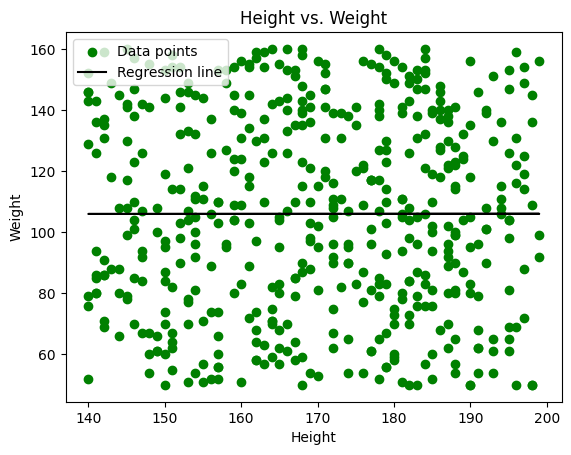

In [129]:
plt.scatter(X['Height'], Y, color='green', label='Data points')
plt.plot(X['Height'], model.predict(X), color='black', label='Regression line')
plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

Fail to reject the null hypothesis : there is no signfiicant linear relationship between Height and Weight. The linear line is perfectly horizontal.